# Credit Card Clustering

# Project Description

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. You need to develop a customer segmentation to define marketing strategy from the dataset.

# Objective

There are a lot of features in this dataset (18 behavioral features). We will now perform:<br>
* Data preprocessing<br>
* Clustering<br>
* Feature extraction to improve clustering<br>
* Experiment with various clustering models: KMeans, Agglomerative Hierarchical, Gaussian Mixture<br>
* Choosing the number of clusters<br>
* EDA to segment the customers<br>
* Concluding the project by giving marketing strategy based on what we learn from the data

# Data Description

Link to the dataset: [Kaggle link](https://www.kaggle.com/arjunbhasin2013/ccdata/downloads/ccdata.zip/1)

Following is the Data Dictionary for Credit Card dataset:<br>
* CUST_ID: Identification of Credit Card holder (Categorical)<br>
* BALANCE: Balance amount left in their account to make purchases<br>
* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
* PURCHASES: Amount of purchases made from account<br>
* ONEOFF_PURCHASES: Maximum purchase amount done in one-go<br>
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment<br>
* CASH_ADVANCE: Cash in advance given by the user<br>
* PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
* ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
* PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
* CASHADVANCEFREQUENCY: How frequently the cash in advance being paid<br>
* CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"<br>
* PURCHASES_TRX: Number of purchase transactions made<br>
* CREDIT_LIMIT: Limit of Credit Card for user<br>
* PAYMENTS: Amount of Payment done by user<br>
* MINIMUM_PAYMENTS: Minimum amount of payments made by user<br>
* PRCFULLPAYMENT: Percent of full payment paid by user<br>
* TENURE: Tenure of credit card service for user

In [ ]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# load the data
data = pd.read_csv('CC GENERAL.csv')

In [ ]:
# data overview
print('Data shape: ' + str(data.shape))
data.head()

Data shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Data Cleaning

First, we check the missing/corrupted values.

In [ ]:
data.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


We will impute these missing values with the median value.

In [ ]:
# impute with median
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].median()

In [ ]:
# double check
data.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


#====================================================

#BOX PLOT for Outlier detection

In [ ]:
# drop ID column
data = data.drop('CUST_ID', axis=1)

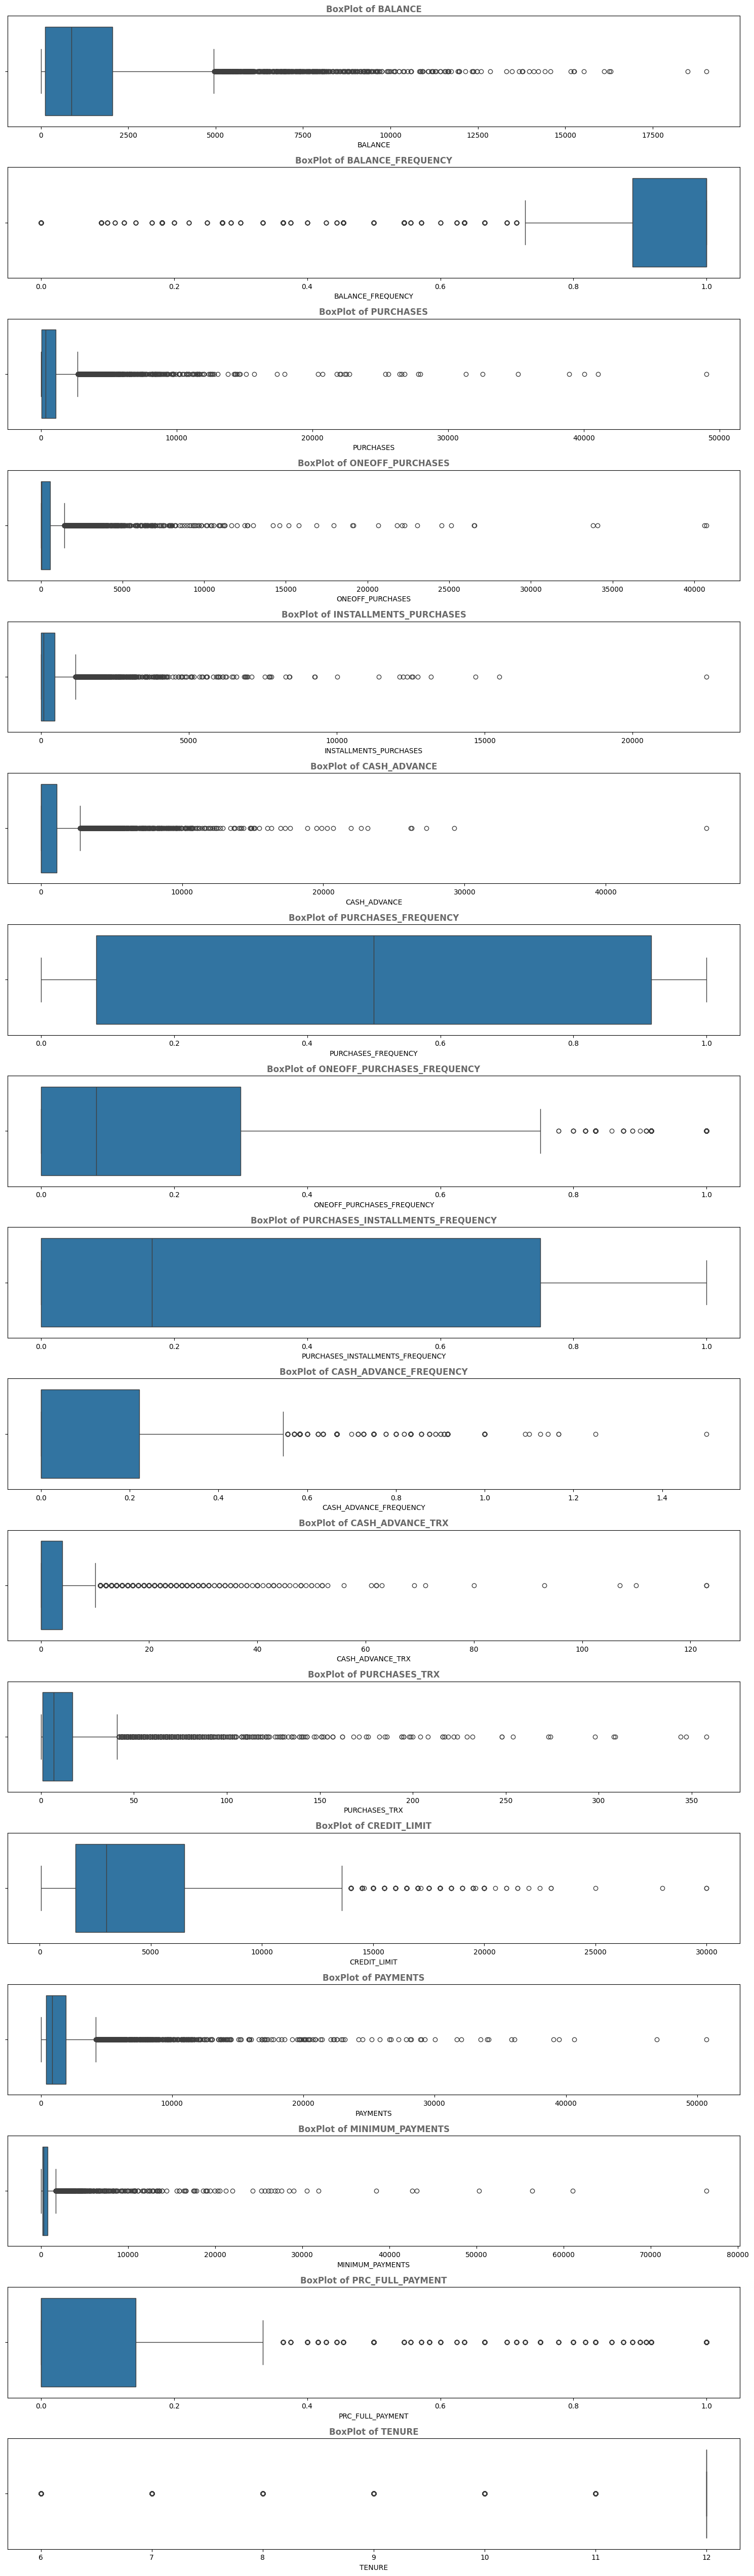

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Assuming all columns are numeric
numeric_columns = data.columns

# Set up the plot size based on the number of columns
plt.figure(figsize=(15, len(numeric_columns) * 3))

# Loop through each numeric column and create a boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=data[column])
    plt.title(f'BoxPlot of {column}', fontsize=12, color='dimgrey', fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#Applying Yeo-johnson Transformation

In [ ]:
from scipy import stats
import pandas as pd

# Apply Yeo-Johnson transformation to each column in the DataFrame
fit_data, lambda_val = data.apply(lambda x: stats.yeojohnson(x)[0]), {col: stats.yeojohnson(data[col])[1] for col in data.columns}

# Convert the result to a DataFrame
fit_data = pd.DataFrame(fit_data, columns=data.columns)

# Display the transformed data and lambda values
fit_data, lambda_val


(        BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
 0      5.524100          65.664751   6.874085          0.000000   
 1     19.863823         112.456053   0.000000          0.000000   
 2     18.665676         187.786558  12.252612          5.492713   
 3     16.849318          20.511329  14.393645          5.929219   
 4     13.977587         187.786558   3.629361          2.607174   
 ...         ...                ...        ...               ...   
 8945   4.814878         187.786558   9.501540          0.000000   
 8946   4.102002         187.786558   9.579526          0.000000   
 8947   4.451801          71.958652   7.791453          0.000000   
 8948   3.517629          71.958652   0.000000          0.000000   
 8949  11.246005          25.126008  13.342995          5.723219   
 
       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
 0                   4.656581      0.000000             0.157724   
 1                   0.000000      6.190043   

In [ ]:
fit_data.shape

(8950, 17)

In [ ]:
fit_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5.524100,65.664751,6.874085,0.000000,4.656581,0.000000,0.157724,0.000000,0.075975,0.000000,0.000000,1.090792,8.384683,9.475916,4.373865,0.000000,6.000009e+20
1,19.863823,112.456053,0.000000,0.000000,0.000000,6.190043,0.000000,0.000000,0.000000,0.126824,0.980624,0.000000,11.371209,21.433776,5.877234,0.109766,6.000009e+20
2,18.665676,187.786558,12.252612,5.492713,0.000000,0.000000,0.769425,0.219919,0.000000,0.000000,0.000000,2.522589,11.483036,13.123324,5.496177,0.000000,6.000009e+20
3,16.849318,20.511329,14.393645,5.929219,0.000000,4.290457,0.080999,0.067672,0.000000,0.064389,0.553324,0.690028,11.483036,0.000000,4.985453,0.000000,6.000009e+20
4,13.977587,187.786558,3.629361,2.607174,0.000000,0.000000,0.080999,0.067672,0.000000,0.000000,0.000000,0.690028,8.651166,13.439781,4.802909,0.000000,6.000009e+20


In [ ]:
data = fit_data

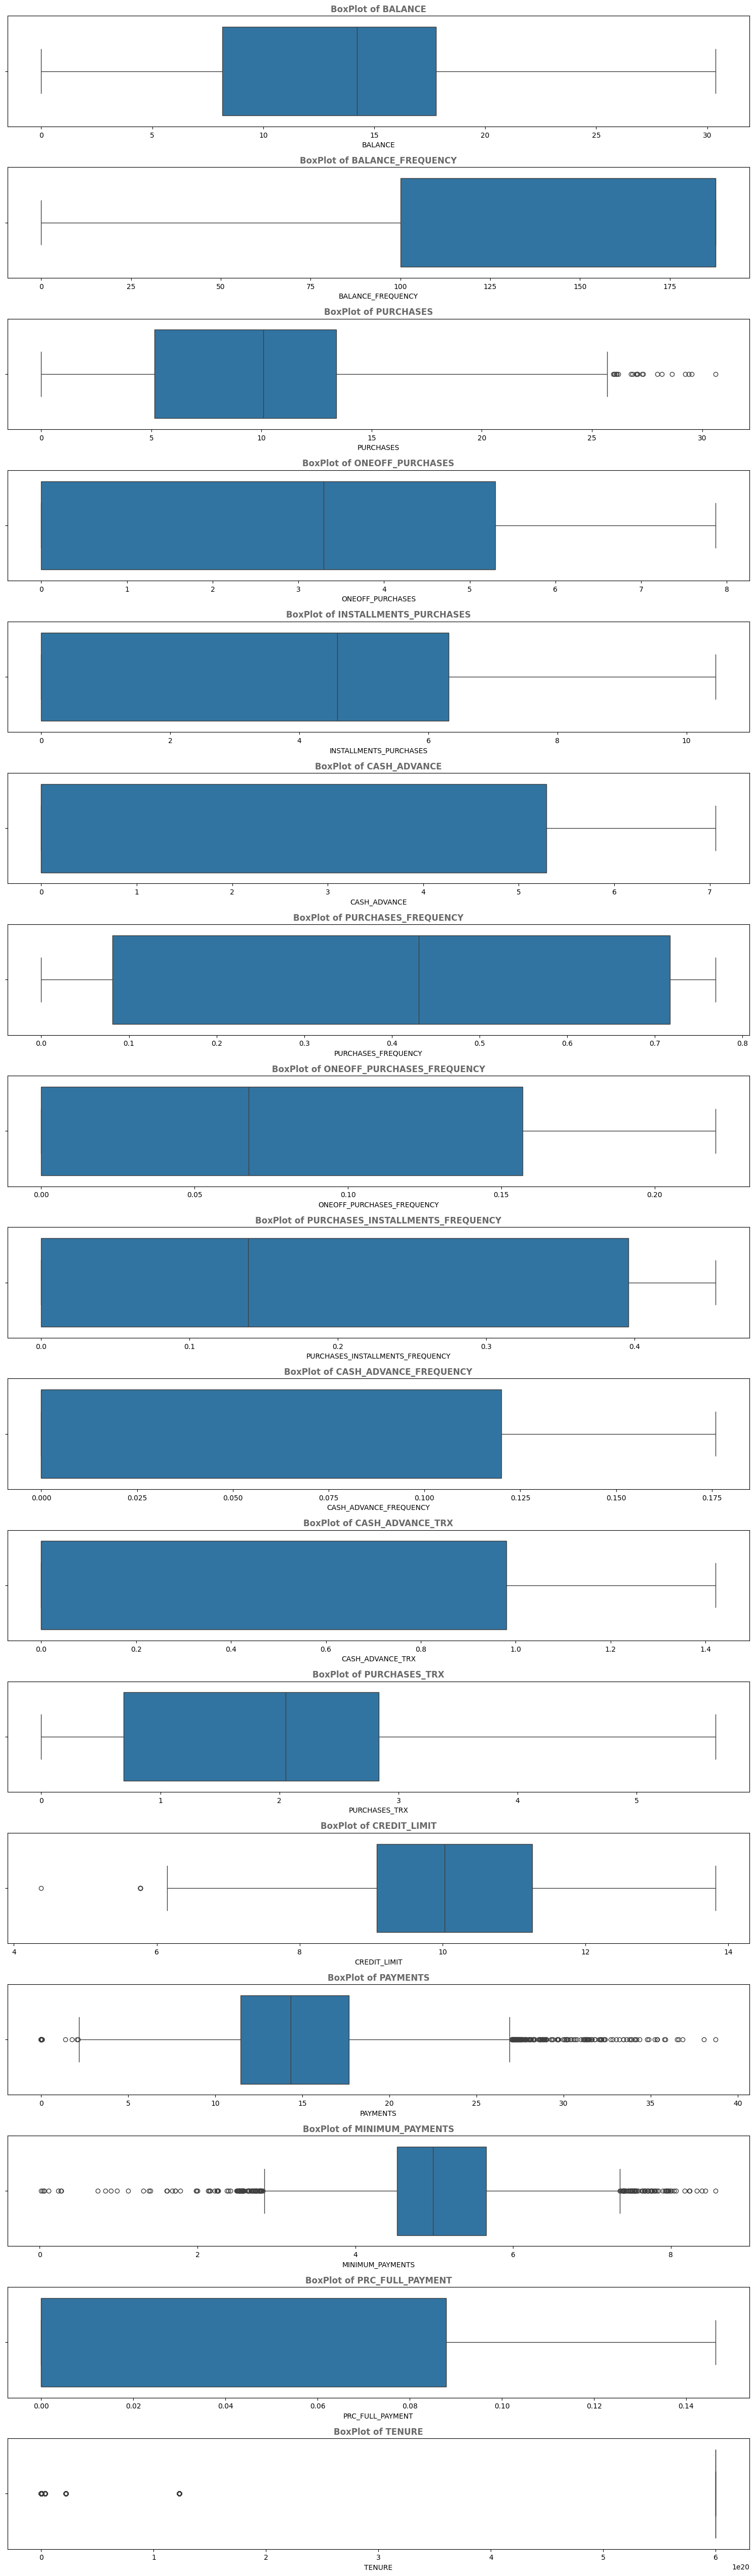

In [ ]:
# Assuming all columns are numeric
numeric_columns = data.columns

# Set up the plot size based on the number of columns
plt.figure(figsize=(15, len(numeric_columns) * 3))

# Loop through each numeric column and create a boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=data[column])
    plt.title(f'BoxPlot of {column}', fontsize=12, color='dimgrey', fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Now normalize the input values using StandardScaler(), drop CUST_ID  and TENURE column

In [ ]:
# normalize values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled.shape

(8950, 17)

In [ ]:
data_imputed = pd.DataFrame(data_scaled, columns=data.columns)

In [ ]:
data_imputed.drop(columns=["TENURE"], inplace=True)

In [ ]:
data_imputed.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

In [ ]:
for col in data_imputed.columns:
  print(col)

BALANCE
BALANCE_FREQUENCY
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT


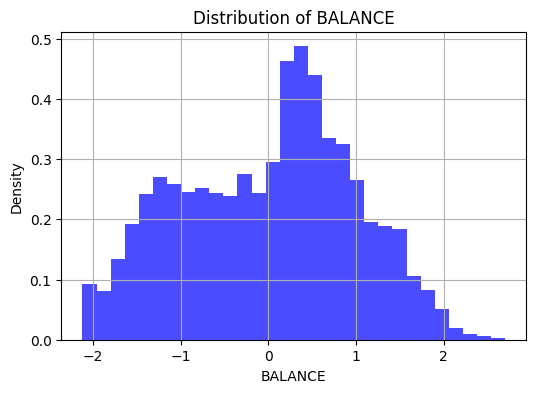

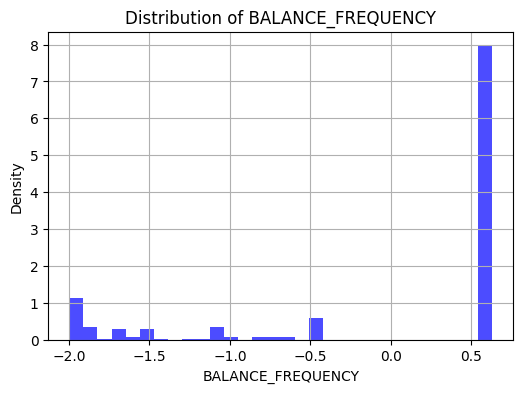

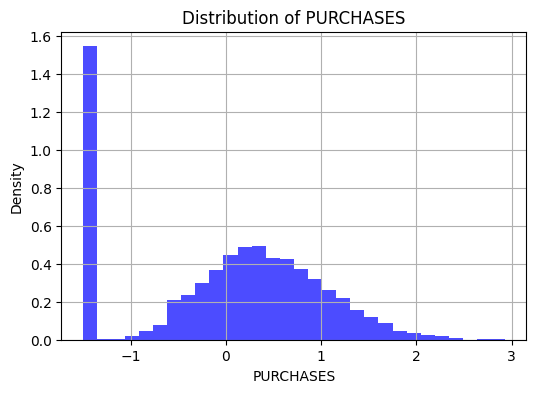

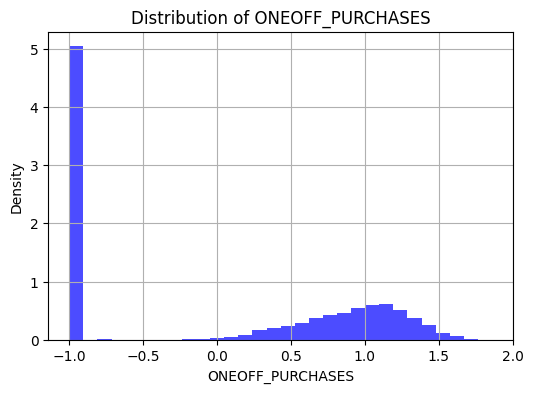

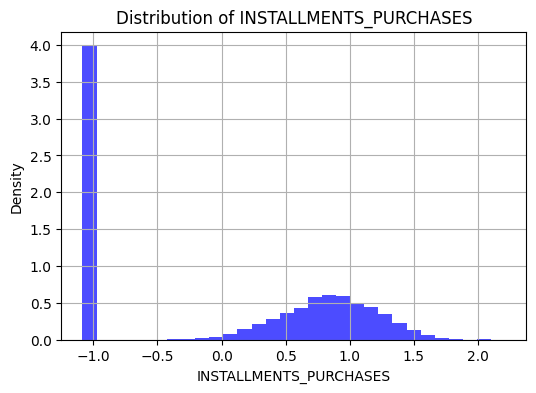

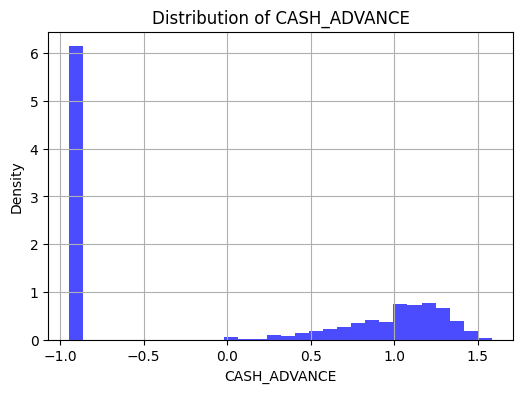

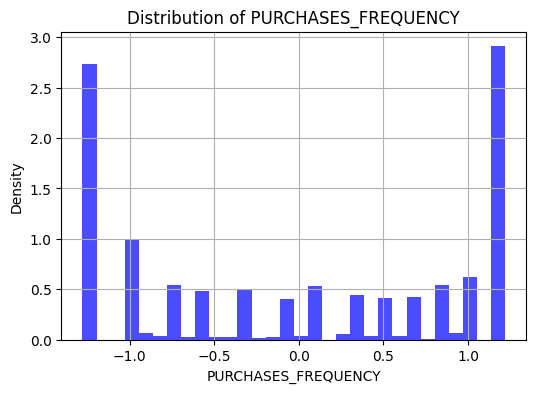

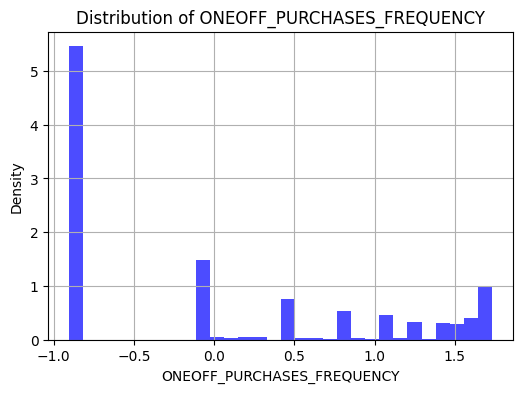

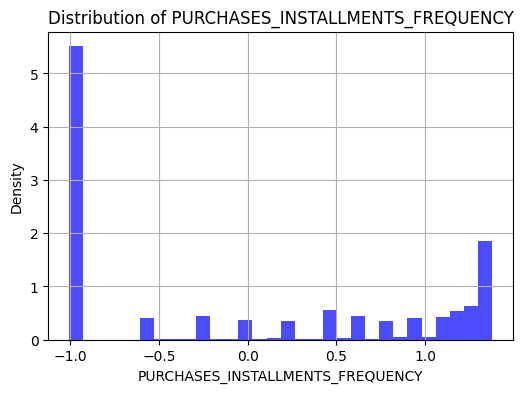

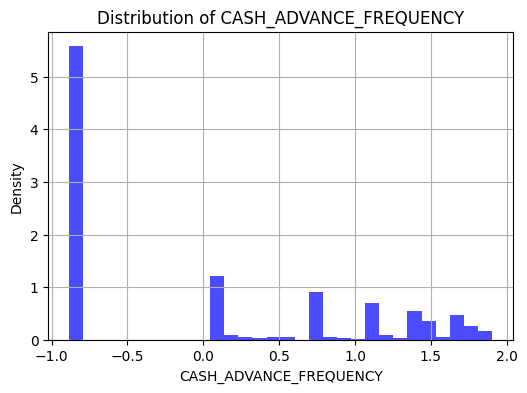

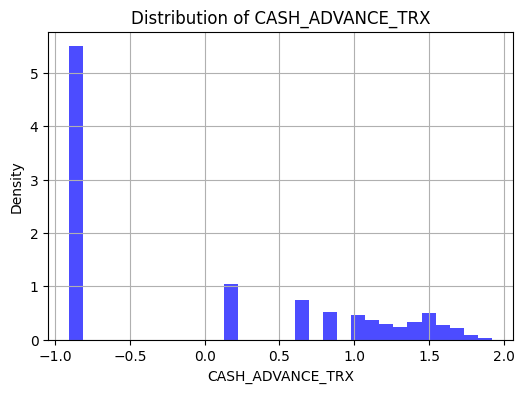

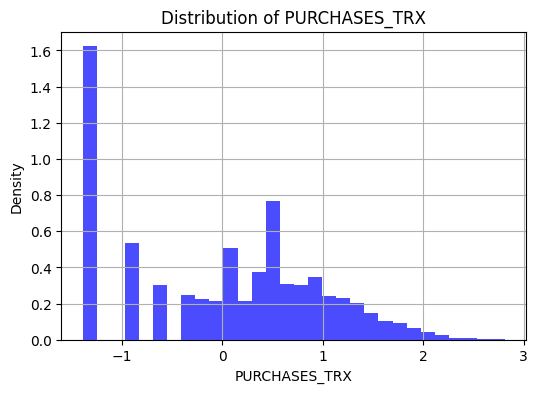

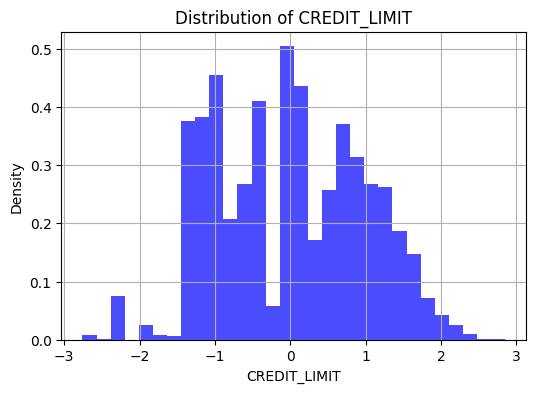

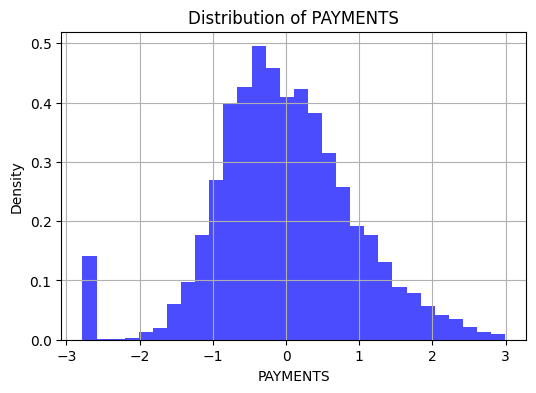

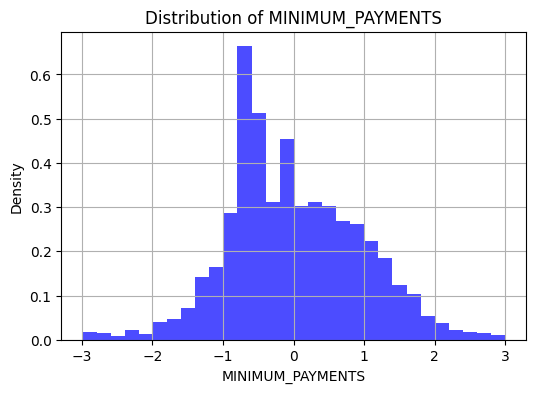

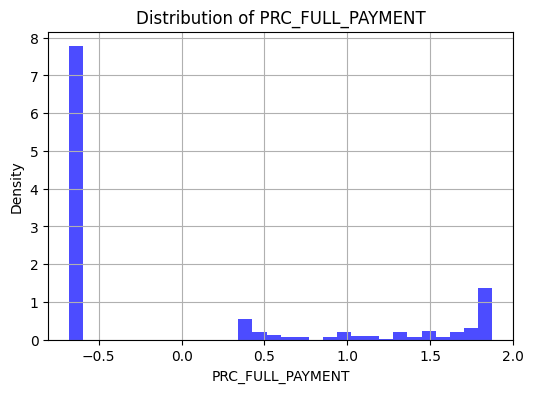

In [ ]:
for col in data_imputed.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data_imputed[col], density=True, bins=30, alpha=0.7, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()



(array([0.00112787, 0.00124065, 0.00417311, 0.01567737, 0.10489173,
        0.44742525, 0.28444832, 0.12846417, 0.01860982, 0.0033836 ]),
 array([-5.86990205, -4.87925562, -3.88860919, -2.89796277, -1.90731634,
        -0.91666991,  0.07397651,  1.06462294,  2.05526937,  3.04591579,
         4.03656222]),
 <BarContainer object of 10 artists>)

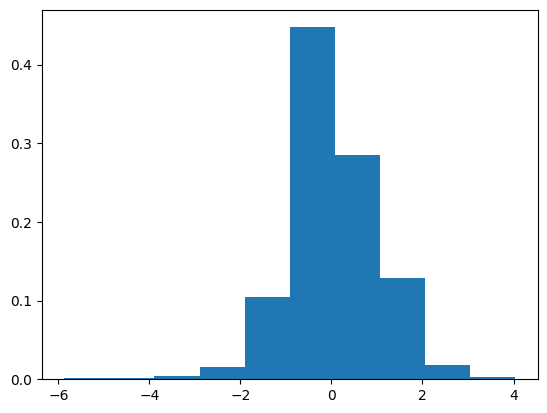

In [ ]:
plt.hist(data_imputed.MINIMUM_PAYMENTS,density=True)

Removing Outlier

In [ ]:


# Assuming 'data_scaled' is your standardized data
def remove_outliers(data_scaled):
    # Create a boolean mask where all Z-scores are less than 3
    mask = np.all(np.abs(data_scaled) < 3, axis=1)
    # Apply the mask to remove outliers
    return data_scaled[mask]

# Remove outliers
data_no_outliers = remove_outliers(data_scaled)

# Check the shape of the data after removing outliers
data_no_outliers.shape


(8818, 17)

In [ ]:
data_imputed = pd.DataFrame(data_no_outliers , columns=data.columns)

In [ ]:
data_imputed.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.238103,-1.079348,-0.368050,-1.000488,0.383704,-0.944538,-0.766859,-0.903315,-0.606642,-0.883204,-0.905801,-0.573664,-1.425353,-0.983876,-0.824388,-0.677889,0.422252
1,1.051961,-0.424939,-1.505149,-1.000488,-1.085422,1.399909,-1.278866,-0.903315,-1.004445,1.124423,1.044342,-1.387624,0.924217,1.285321,0.917393,1.235021,0.422252
2,0.860616,0.628612,0.521657,1.065381,-1.085422,-0.944538,1.218860,1.732554,-1.004445,-0.883204,-0.905801,0.494757,1.012194,-0.291722,0.475906,-0.677889,0.422252
3,0.570542,-1.710851,0.875823,1.229556,-1.085422,0.680451,-1.015926,-0.092230,-1.004445,0.136071,0.194580,-0.872718,1.012194,-2.782085,-0.115812,-0.677889,0.422252
4,0.111925,0.628612,-0.904786,-0.019902,-1.085422,-0.944538,-1.015926,-0.092230,-1.004445,-0.883204,-0.905801,-0.872718,-1.215705,-0.231669,-0.327305,-0.677889,0.422252


We should now be good to go for clustering.

# Clustering

## Correlation Check

<Axes: >

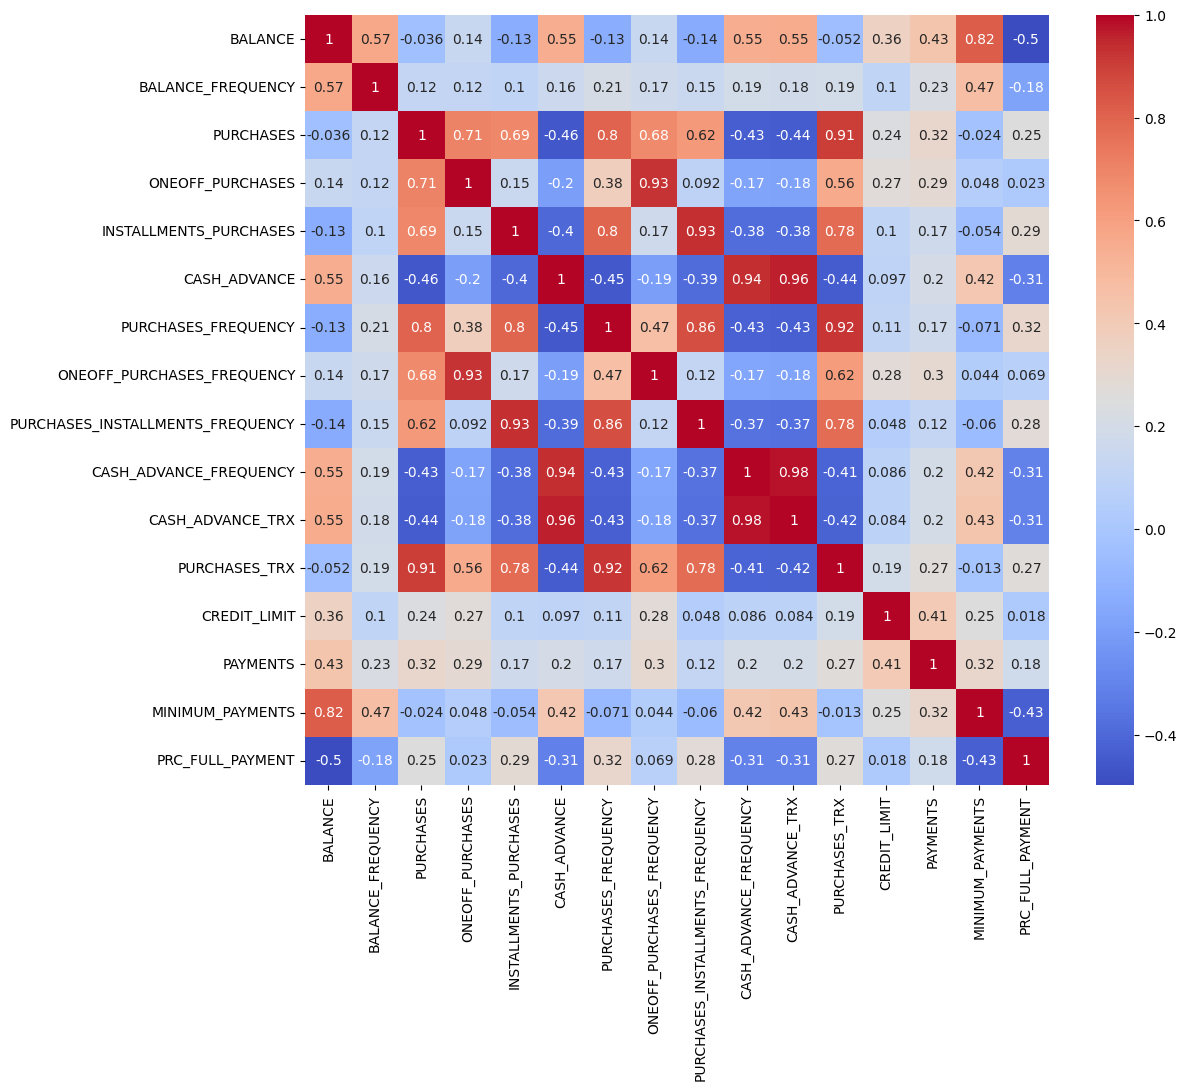

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm',
            xticklabels=data_imputed.columns,
            yticklabels=data_imputed.columns)

## Clustering using K-Means

In this section we will perform K-Means clustering on the data and check the clustering metrics (inertia, silhouette scores).

### Inertia Plot Elbow method

First, we make the inertia plot:

In [ ]:
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

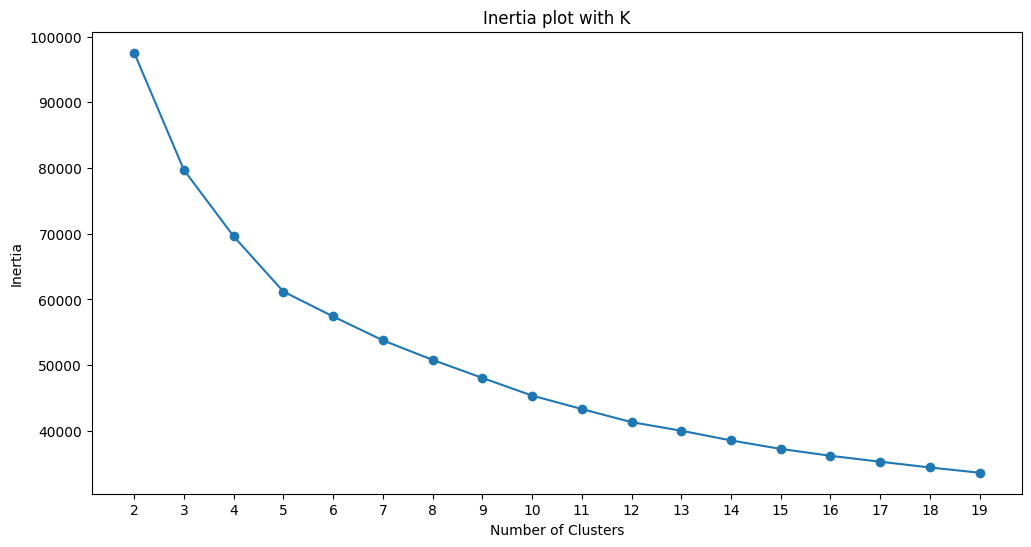

In [ ]:
inertia_plot(KMeans, data_imputed)

Using the elbow method, we pick a good number of clusters to be 6.

### Silhouette Scores

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

We will now check the silhouette scores for different numbers of clusters.

In [ ]:
def silh_samp_cluster(clust,  X, start=2, stop=5, metric = 'euclidean'):
    # taken from sebastian Raschkas book Python Machine Learning second edition
    for x in range(start, stop):
        km = clust(n_clusters = x)
        y_km = km.fit_predict(X)
        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_km, metric = metric)
        y_ax_lower, y_ax_upper =0,0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i)/n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper),
                    c_silhouette_vals,
                    height=1.0,
                    edgecolor='none',
                    color = color)
            yticks.append((y_ax_lower + y_ax_upper)/2.)
            y_ax_lower+= len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg,
                   color = 'red',
                   linestyle = "--")
        plt.yticks(yticks, cluster_labels+1)
        plt.ylabel("cluster")
        plt.xlabel('Silhouette Coefficient')
        plt.title('Silhouette for ' + str(x) + " Clusters")
        plt.show()

In [ ]:
for x in range(2, 7):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(data_imputed)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_imputed, label))

Silhouette-Score for 2 Clusters:  0.2785178575532283
Silhouette-Score for 3 Clusters:  0.2555208320008421
Silhouette-Score for 4 Clusters:  0.25338001863533877
Silhouette-Score for 5 Clusters:  0.26825139791151575
Silhouette-Score for 6 Clusters:  0.25657081005496074


Silhouette plots:

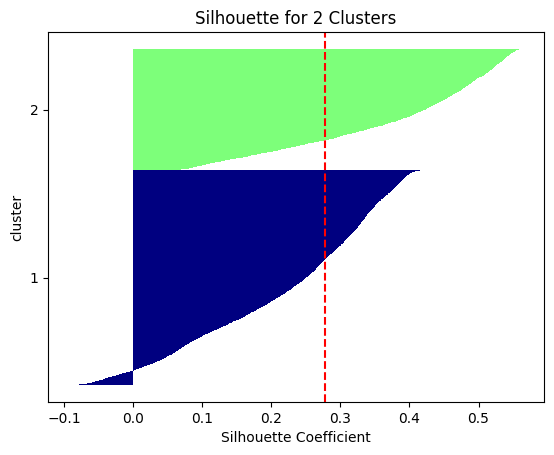

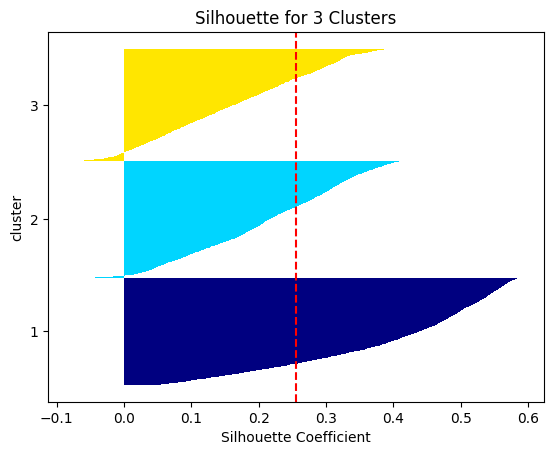

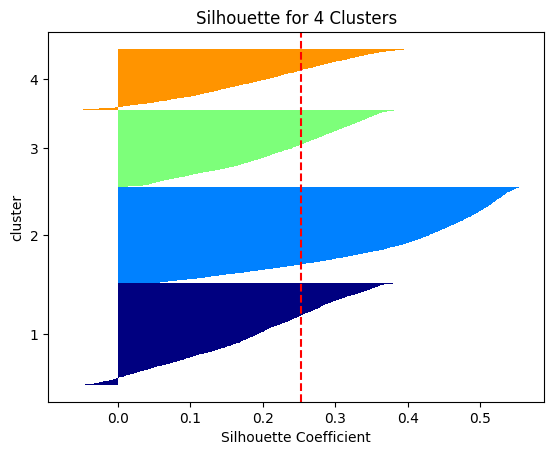

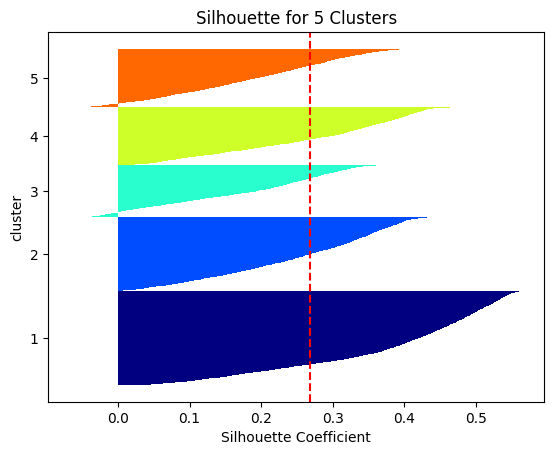

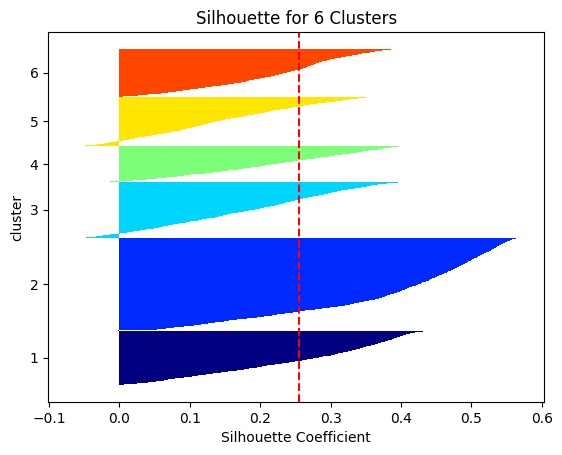

In [ ]:
silh_samp_cluster(KMeans, data_imputed, stop=7)

So far, we have a high average inertia, low silhouette scores, and very wide fluctuations in the size of the silhouette plots. This is not good. Let's apply feature extraction with PCA to improve clustering.

## Feature Extraction with PCA

### Clustering Metrics

Now we will apply PCA to improve clustering. We should be able to see lower inertias and higher silhouette scores after feature extraction.

In [ ]:
# apply PCA and display clustering metrics
for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(data_imputed)
    for x in range(2, 7):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.4450997555315064        Inertia:  44865.711073941326
Silhouette-Score for 3 Clusters:  0.43952482348948896        Inertia:  27240.31288636264
Silhouette-Score for 4 Clusters:  0.43907717756922227        Inertia:  19675.375166310256
Silhouette-Score for 5 Clusters:  0.4215548926071005        Inertia:  16609.832214635055
Silhouette-Score for 6 Clusters:  0.3913029708711648        Inertia:  13721.354447809419

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.3814178551987945        Inertia:  59868.980287171915
Silhouette-Score for 3 Clusters:  0.36965600400740756        Inertia:  42228.088539156466
Silhouette-Score for 4 Clusters:  0.39345706466067926        Inertia:  33476.63296837352
Silhouette-Score for 5 Clusters:  0.4118565399439385        Inertia:  25664.338033695552
Silhouette-Score for 6 Clusters:  0.3963686888181488        Inertia:  22609.47671312952

PCA with # of components:  4
Silhouette-Score for

As you can see, 2 PCA components with 5-6 clusters would be our best bet.

## Visualization

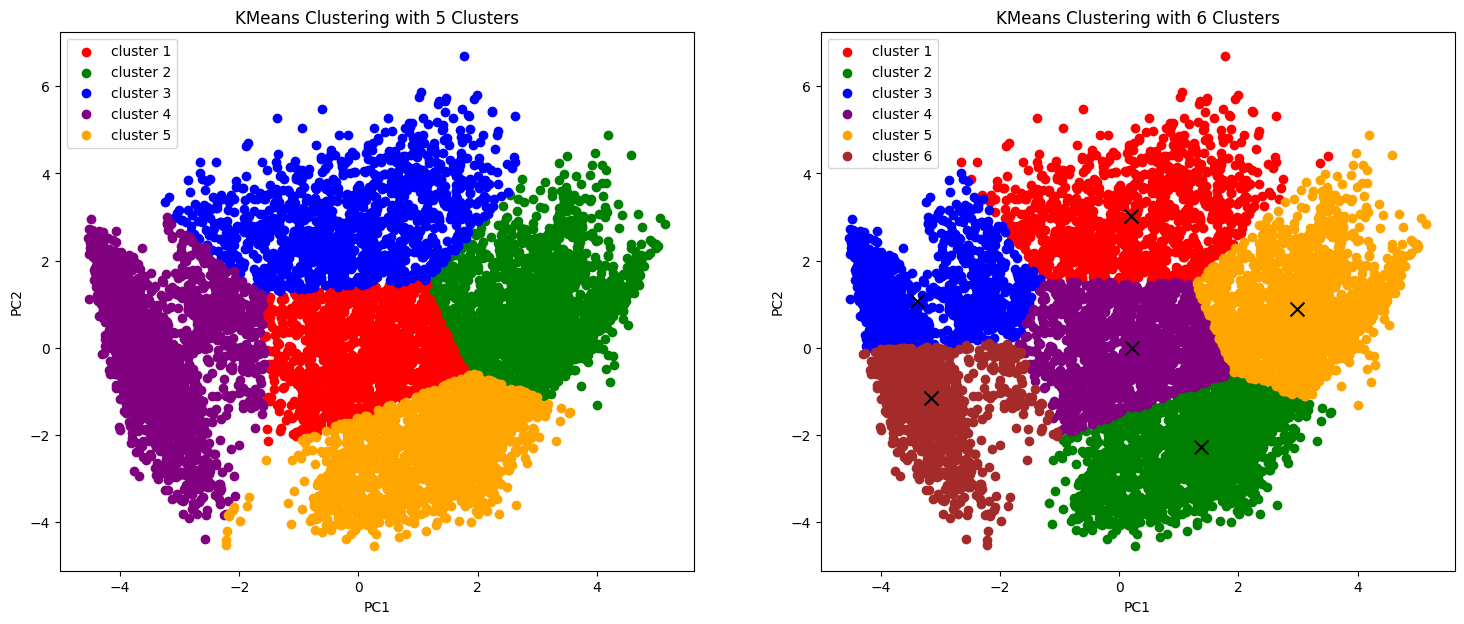

In [ ]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(KMeans(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('KMeans Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
centroids = KMeans(n_clusters=6).fit(data_p[[0, 1]]).cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')


# Analyze Cluster Characteristics:

We can aggregate the original features by cluster to see the average value of each feature within each cluster. This will help in understanding what each cluster represents in terms of the original features

In [ ]:
# Shift the cluster numbers to start from 1 instead of 0
preds = preds + 1

# Concatenate the data and cluster labels
clustered_data = pd.concat([data_imputed, preds], axis=1)

# Rename the columns appropriately
clustered_data.columns = list(data_imputed.columns) + ['Cluster']

# Calculate the mean of each feature per cluster
cluster_means = clustered_data.groupby('Cluster').mean()

# Display the mean values per cluster
cluster_means



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
Cluster,,,,,,,,,,,,,,,,
1,1.027561,0.509437,0.779201,0.768844,0.519341,1.048802,0.677237,0.790857,0.466382,1.060603,1.075183,0.809897,0.642332,0.698413,0.934238,-0.415571
2,-1.237714,-0.868664,0.092440,-0.427154,0.337521,-0.937604,0.269997,-0.455763,0.370896,-0.877277,-0.899525,0.117819,-0.353893,-0.666246,-0.907383,0.602564
3,1.005543,0.449883,-1.044856,-0.515693,-0.997448,1.149709,-1.115415,-0.574037,-0.956866,1.235825,1.223229,-1.101781,0.476359,0.340639,0.836474,-0.509001
4,0.138826,0.258967,0.207484,0.230101,-0.138822,-0.281558,-0.008429,0.127437,-0.181199,-0.328283,-0.313393,0.053749,-0.362539,-0.204986,0.153045,-0.379898
5,0.018845,0.442605,1.059519,0.917089,0.919142,-0.842388,1.033001,1.019176,0.868293,-0.806045,-0.822781,1.124421,0.427353,0.531218,-0.059296,0.440306
6,-0.048554,-0.289791,-1.407834,-0.894847,-1.062841,0.885228,-1.245570,-0.833135,-0.993033,0.710490,0.747613,-1.328504,-0.643691,-0.447195,-0.234924,-0.306752


In [ ]:
data_imputed.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000,8818.000000
mean,-0.002895,0.005585,-0.003770,0.000589,-0.001779,-0.002515,0.000310,0.000881,-0.000770,-0.000953,-0.001539,-0.002111,-0.006862,-0.018682,-0.001306,-0.002805
std,0.989021,0.995930,0.988316,0.997284,0.997175,0.998602,0.998589,0.998963,0.999108,1.000083,0.999400,0.994544,0.987600,0.962501,0.939796,0.998724
min,-2.120305,-1.997716,-1.505149,-1.000488,-1.085422,-0.944538,-1.278866,-0.903315,-1.004445,-0.883204,-0.905801,-1.387624,-2.757555,-2.782085,-2.991428,-0.677889
25%,-0.810751,-0.598992,-0.628236,-1.000488,-1.085422,-0.944538,-1.015926,-0.903315,-1.004445,-0.883204,-0.905801,-0.872718,-0.956232,-0.608840,-0.643161,-0.677889
50%,0.148657,0.628612,0.161175,0.252618,0.361850,-0.944538,0.119657,-0.092230,-0.273845,-0.883204,-0.905801,0.143257,-0.129660,-0.068846,-0.115812,-0.677889
75%,0.701723,0.628612,0.707496,0.988772,0.902885,1.058043,1.050283,0.978077,1.069884,1.016910,1.044342,0.729118,0.728841,0.560891,0.649566,0.854117
max,2.698716,0.628612,2.933399,1.860975,2.212015,1.584878,1.218860,1.732554,1.377136,1.902718,1.921254,2.817107,2.851804,2.994019,2.998485,1.873638


data.summary()

#Enhanced Visualization:

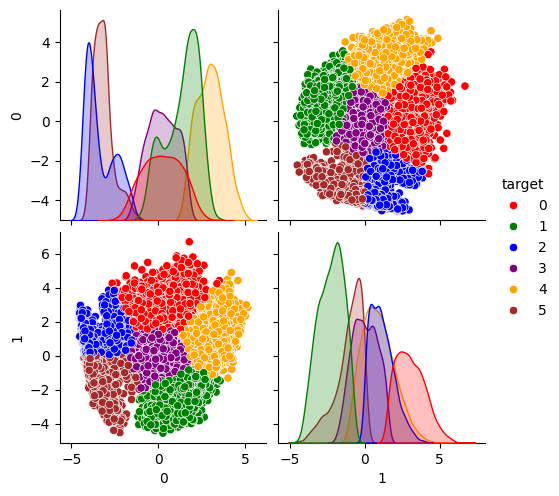

In [ ]:
import seaborn as sns
sns.pairplot(data_p, hue='target', palette=colors)
plt.show()


So far, by applying PCA we have made notable improvement to KMeans model. Let's try other clustering models as well!

## Agglomerative Hierarchical Clustering with PCA

Text(0, 0.5, 'PC2')

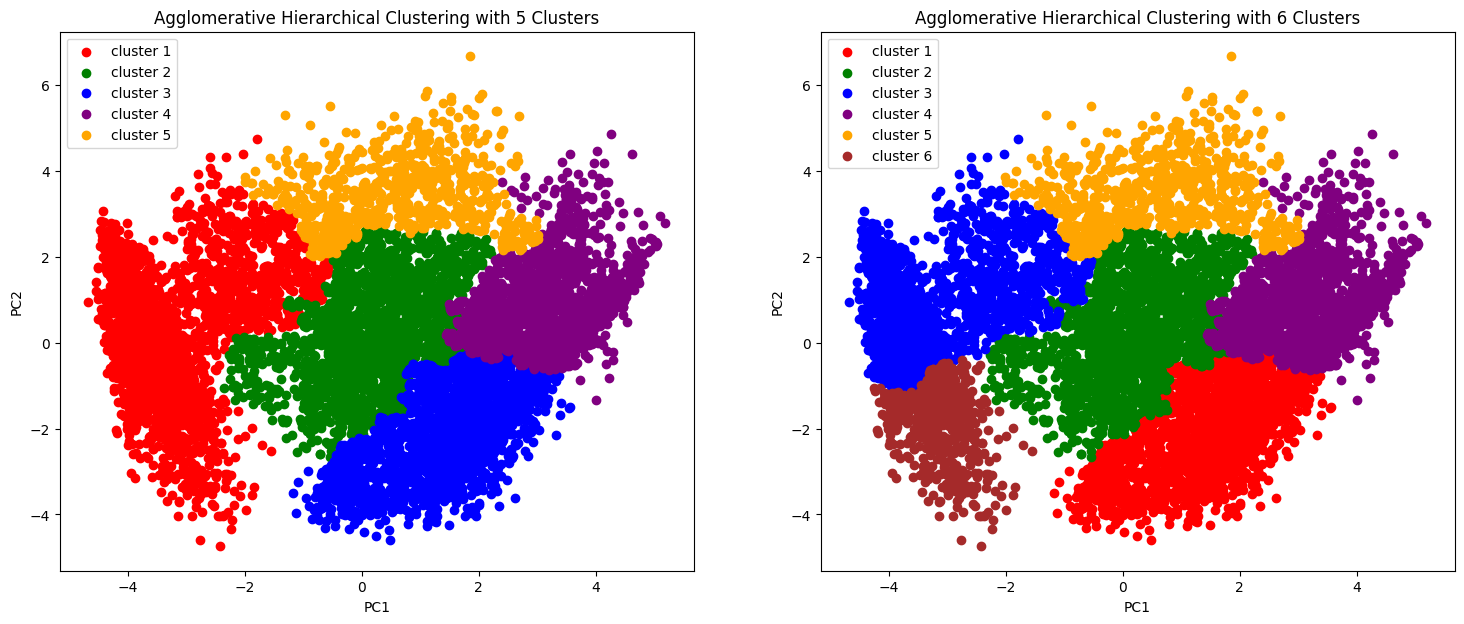

In [ ]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(AgglomerativeClustering(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(AgglomerativeClustering(n_clusters = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Agglomerative Hierarchical Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

## Gaussian Mixture Clustering with PCA

Text(0, 0.5, 'PC2')

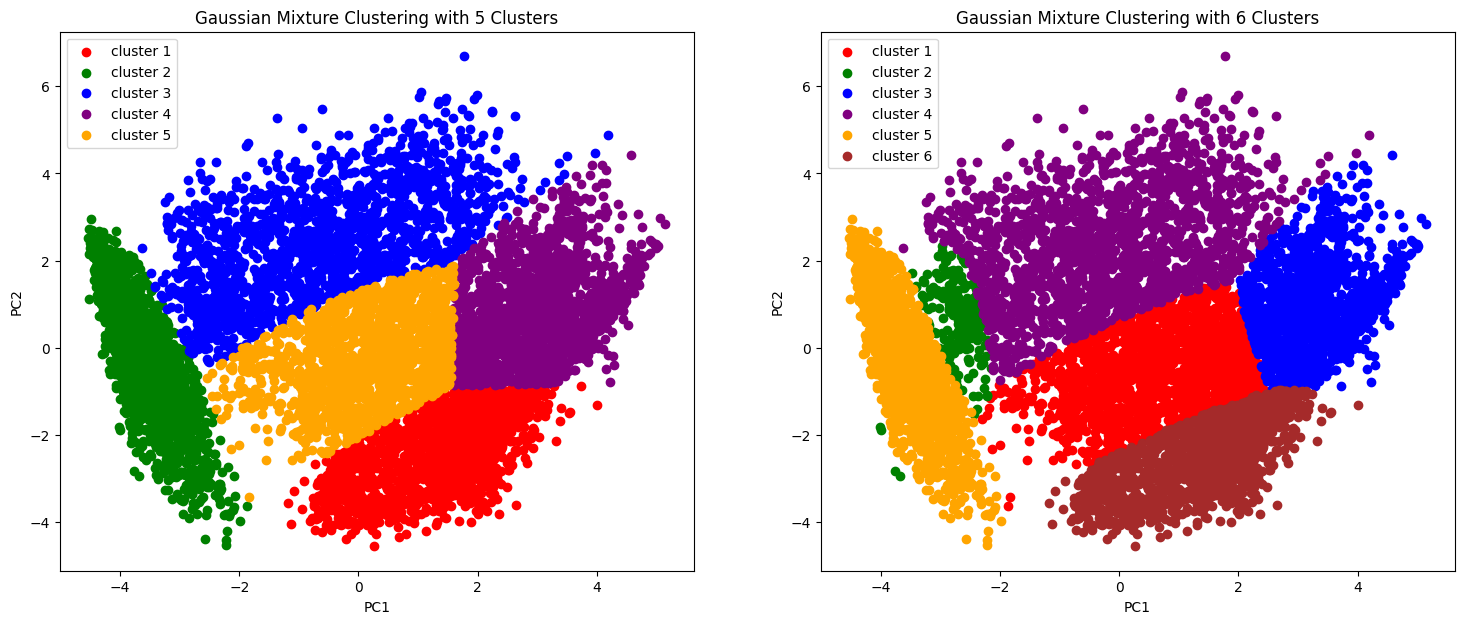

In [ ]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(GaussianMixture(n_components = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.legend()
plt.title('Gaussian Mixture Clustering with 5 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))
preds = pd.Series(GaussianMixture(n_components = 6,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.scatter(data_p[data_p['target']==4].iloc[:,0], data_p[data_p.target==4].iloc[:,1], c = colors[4], label = 'cluster 5')
plt.scatter(data_p[data_p['target']==5].iloc[:,0], data_p[data_p.target==5].iloc[:,1], c = colors[5], label = 'cluster 6')
plt.legend()
plt.title('Gaussian Mixture Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

#Compare the model

#Compute and Print Metrics

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, KMeans
import pandas as pd
import matplotlib.pyplot as plt

# PCA-reduced data
data_p = pd.DataFrame(PCA(n_components=2).fit_transform(data_imputed))

# K-Means Clustering
kmeans = KMeans(n_clusters=6)
kmeans_labels = kmeans.fit_predict(data_p)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=6)
hierarchical_labels = hierarchical.fit_predict(data_p)

# Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=6)
gmm_labels = gmm.fit_predict(data_p)

# Compute metrics
metrics = {
    'K-Means': {
        'Silhouette Score': silhouette_score(data_p, kmeans_labels),
        'Davies-Bouldin Index': davies_bouldin_score(data_p, kmeans_labels)
    },
    'Hierarchical': {
        'Silhouette Score': silhouette_score(data_p, hierarchical_labels),
        'Davies-Bouldin Index': davies_bouldin_score(data_p, hierarchical_labels)
    },
    'GMM': {
        'Silhouette Score': silhouette_score(data_p, gmm_labels),
        'Davies-Bouldin Index': davies_bouldin_score(data_p, gmm_labels)
    }
}

# Print metrics
for method, scores in metrics.items():
    print(f"{method} Clustering:")
    for metric, score in scores.items():
        print(f"  {metric}: {score:.4f}")
    print()


K-Means Clustering:
  Silhouette Score: 0.3906
  Davies-Bouldin Index: 0.8685

Hierarchical Clustering:
  Silhouette Score: 0.3526
  Davies-Bouldin Index: 0.8604

GMM Clustering:
  Silhouette Score: 0.3718
  Davies-Bouldin Index: 0.8579



#Plot Cluster Visualizations

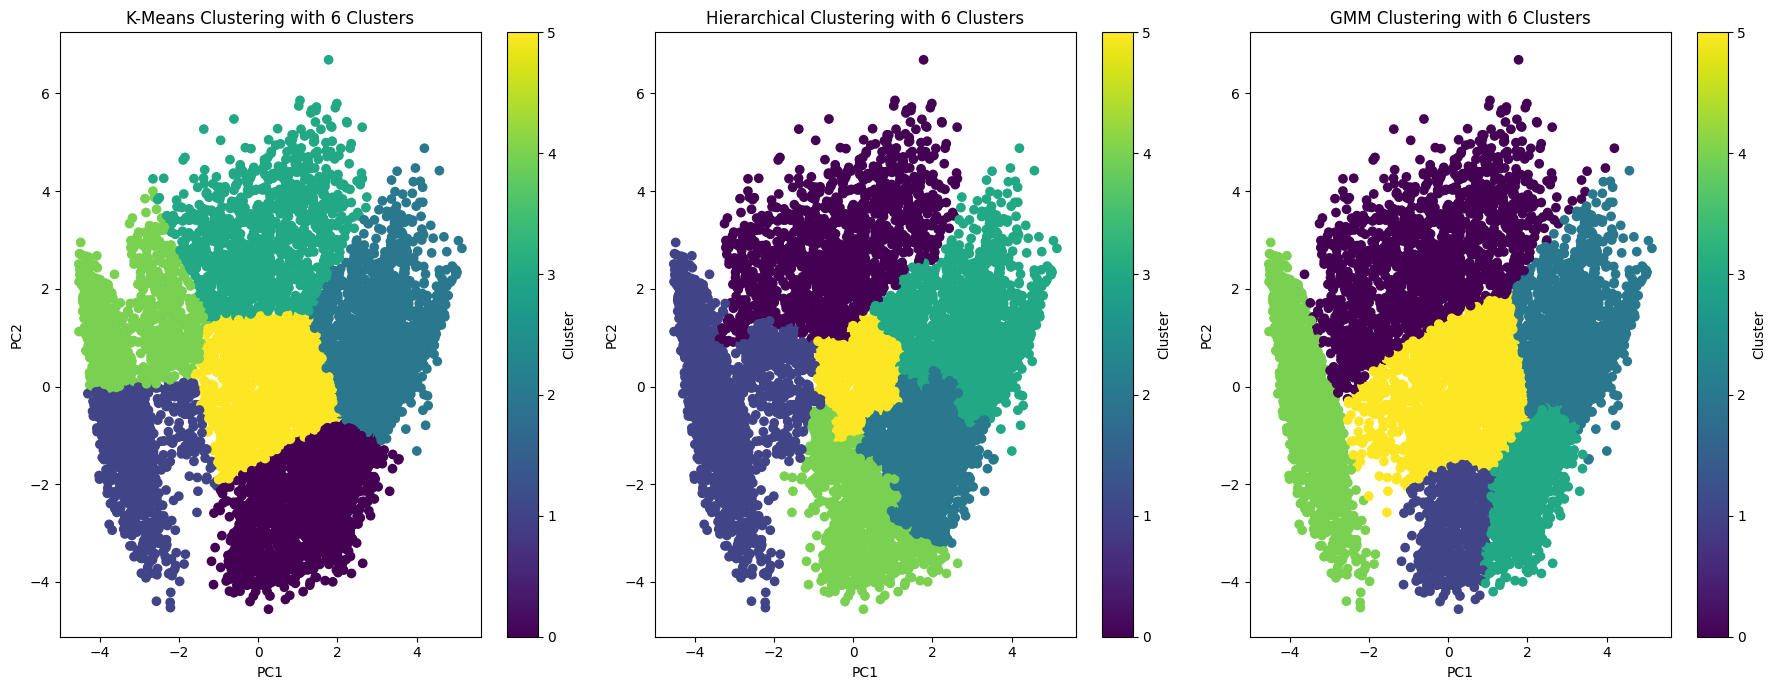

In [ ]:
# Plot K-Means Clustering
plt.figure(figsize=(18, 7))

plt.subplot(131)
plt.scatter(data_p[0], data_p[1], c=kmeans_labels, cmap='viridis', label='K-Means')
plt.title('K-Means Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')

# Plot Hierarchical Clustering
plt.subplot(132)
plt.scatter(data_p[0], data_p[1], c=hierarchical_labels, cmap='viridis', label='Hierarchical')
plt.title('Hierarchical Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')

# Plot GMM Clustering
plt.subplot(133)
plt.scatter(data_p[0], data_p[1], c=gmm_labels, cmap='viridis', label='GMM')
plt.title('GMM Clustering with 6 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()


#PCA Analysis

In [ ]:
data.shape

(8950, 17)

In [ ]:
data_imputed = pd.DataFrame(data_imputed)

In [ ]:
data_imputed.shape

(100, 20)

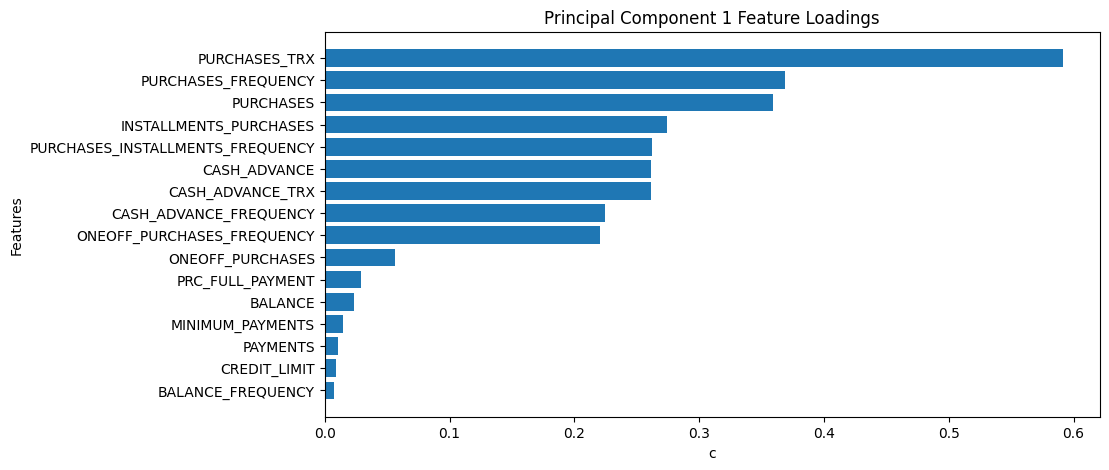

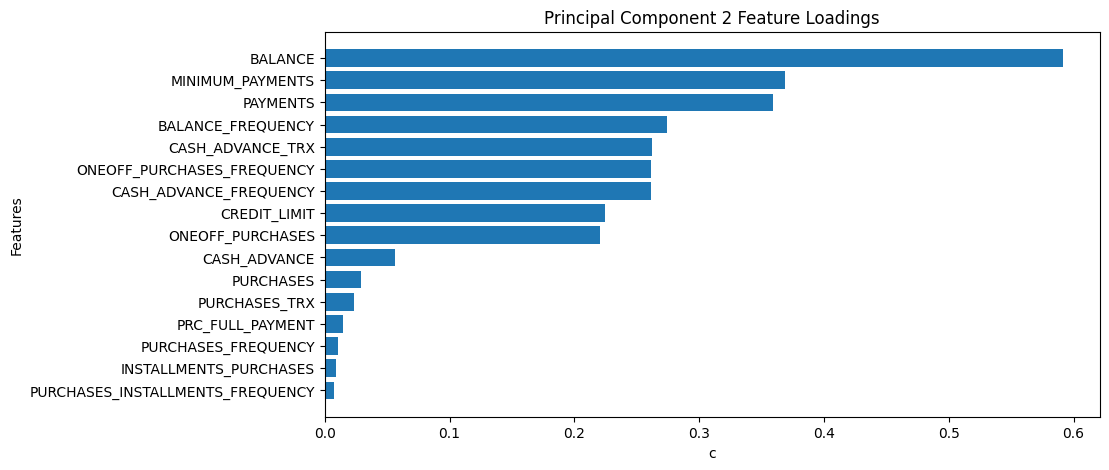

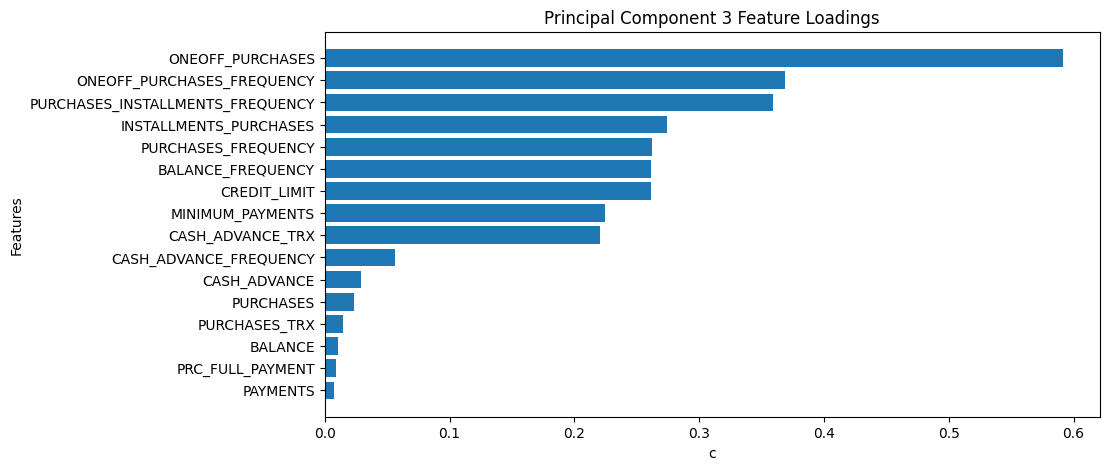

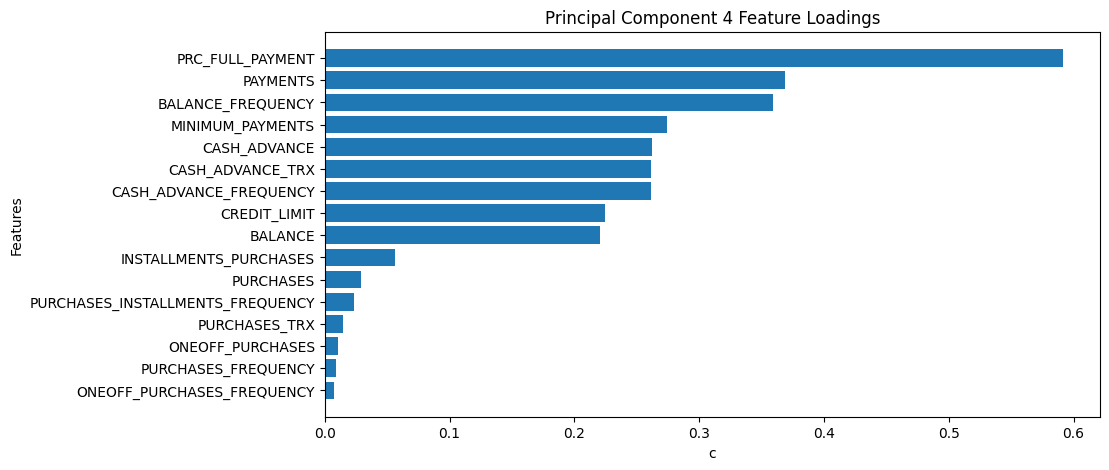

In [ ]:
abs_loadings = np.abs(pca.components_)

# Create a list of feature names
feature_names = data_imputed.columns.tolist()

# Create a ranking of features based on loadings for each principal component
ranking_per_component = []
for component_loadings in abs_loadings:
    component_ranking = [feature_names[i] for i in np.argsort(component_loadings)[::-1]]
    ranking_per_component.append(component_ranking)

# Plot or display the ranking of features for each principal component
for i, component_ranking in enumerate(ranking_per_component):
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(component_ranking)), component_loadings[np.argsort(component_loadings)[::-1]])
    plt.yticks(range(len(component_ranking)), component_ranking)
    plt.title(f"Principal Component {i+1} Feature Loadings")
    plt.xlabel("c")
    plt.ylabel("Features")
    plt.gca().invert_yaxis()  # Invert y-axis to display highest loading at the top
    plt.show()

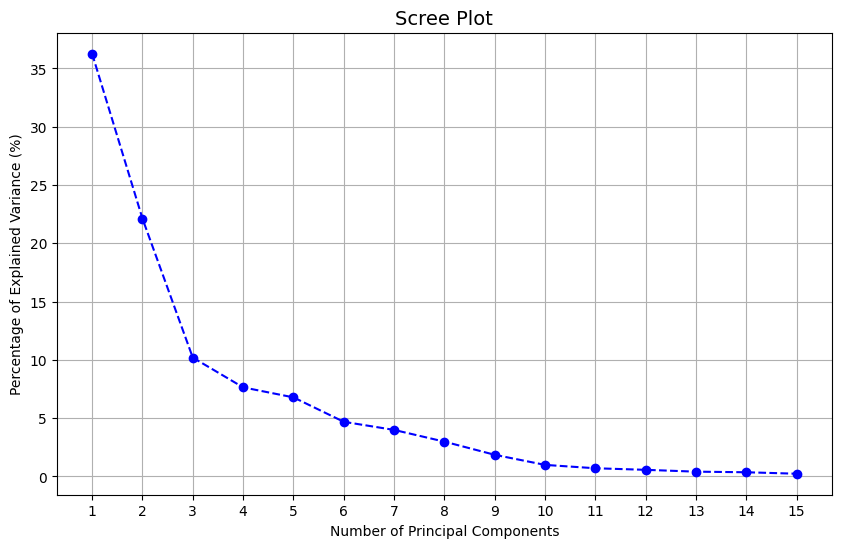

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit PCA with the maximum number of components you used
max_components = 15  # Ensure this is the maximum number of components you used
pca = PCA(n_components=max_components)
pca.fit(data_imputed)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_ * 100

# Create a Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot', fontsize=14)
plt.xlabel('Number of Principal Components')
plt.ylabel('Percentage of Explained Variance (%)')
plt.xticks(range(1, max_components + 1))
plt.grid(True)
plt.show()


#  Analysis

We are picking 6 clusters for this EDA. Let's make a Seaborn pairplot with selected/best columns to show how the clusters are segmenting the samples:

In [ ]:
# select best columns
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

# dataframe with best columns
data_final = pd.DataFrame(data_imputed[best_cols])

print('New dataframe with best columns has just been created. Data shape: ' + str(data_final.shape))

New dataframe with best columns has just been created. Data shape: (8950, 6)


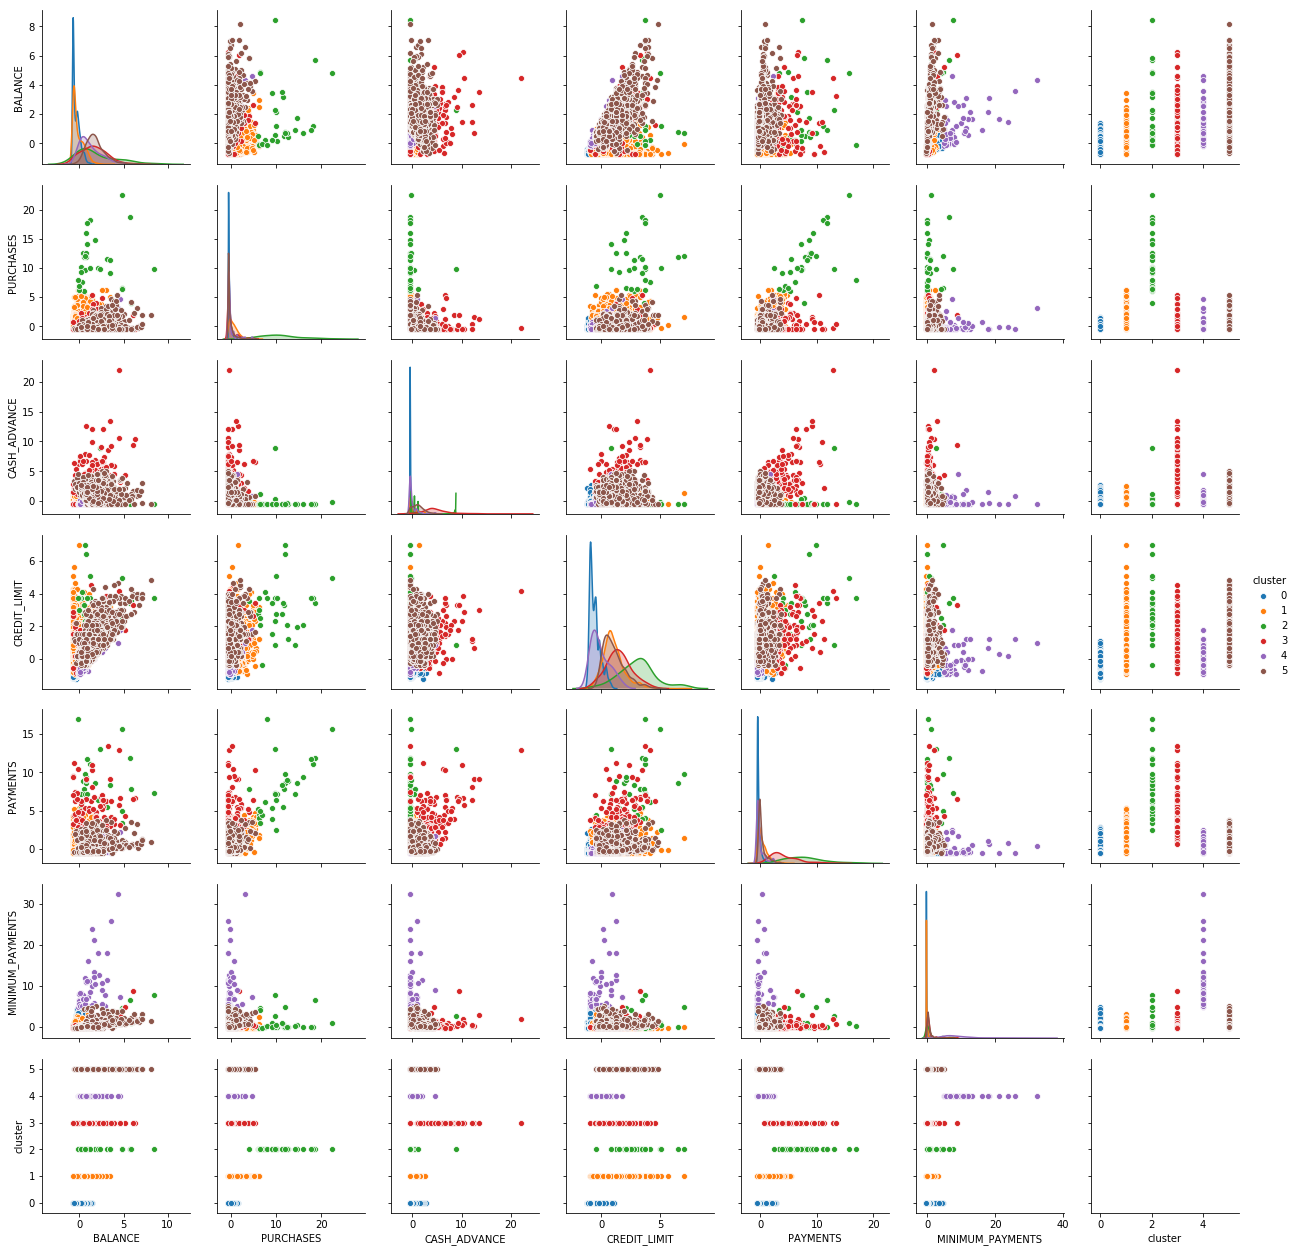

In [ ]:
# apply KMeans clustering
alg = KMeans(n_clusters = 6)
label = alg.fit_predict(data_final)

# create a 'cluster' column
data_final['cluster'] = label
best_cols.append('cluster')

# make a Seaborn pairplot
sns.pairplot(data_final[best_cols], hue='cluster')

We can see some interesting correlations between features and clusters that we have made above. Let's get into detailed analysis.

## Cluster 0 (Blue): The Average Joe

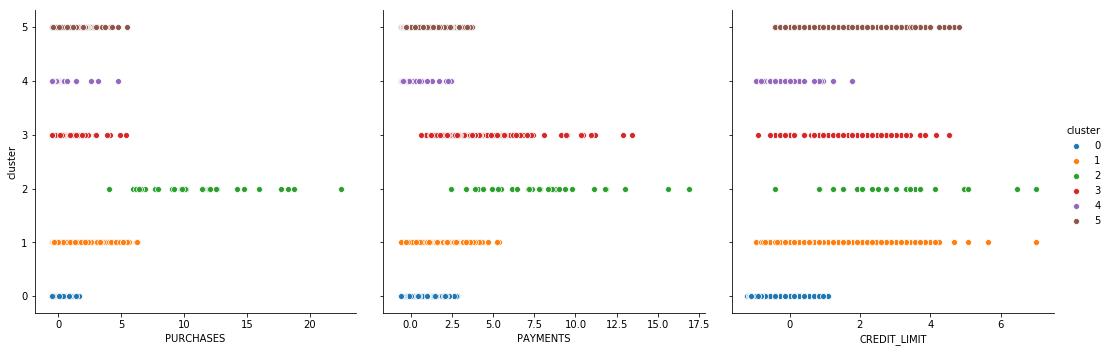

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
            y_vars=['cluster'],
            height=5, aspect=1)

This group of users, while having the highest number of users by far, is fairly frugal: they have lowest purchases, second lowest payments, and lowest credit limit. The bank would not make much profit from this group, so there should be some sorts of strategy to attract these people more.

## Cluster 1 (Orange): The Active Users

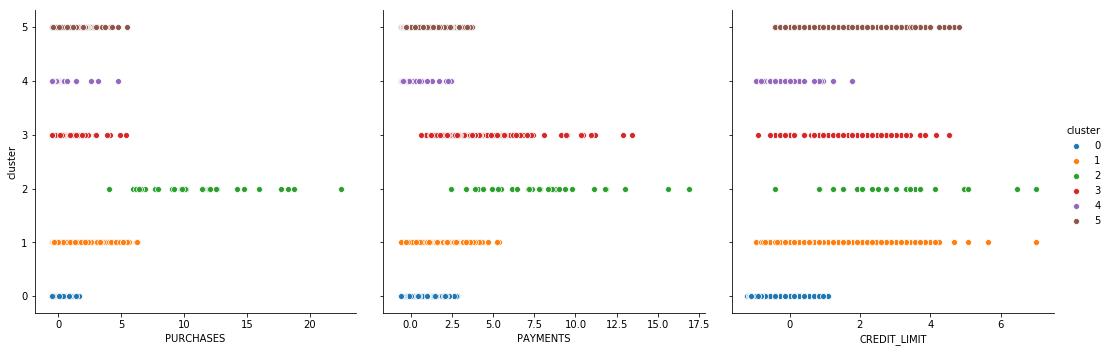

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
            y_vars=['cluster'],
            height=5, aspect=1)

This group of users is very active in general: they have second highest purchases, third highest payments, and the most varied credit limit values. This type of credit card users is the type you should spend the least time and effort on, as they are already the ideal one.

## Cluster 2 (Green): The Big Spenders

The Big Spenders. This group is by far the most interesting to analyze, since they do not only have the highest number of purchases, highest payments, highest minimum payments, but the other features are also wildly varied in values. Let's take a quick look at the pairplots.

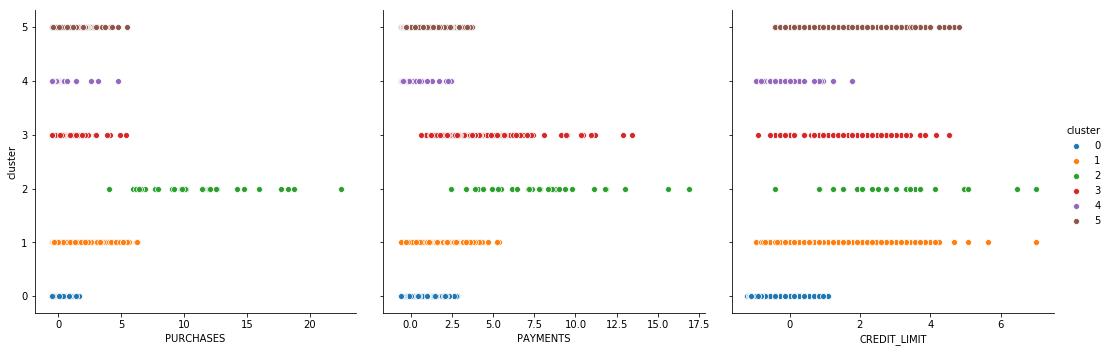

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'], y_vars=['cluster'],
            height=5, aspect=1)

As a nature of the "Big Spenders", there are many outliers in this cluster: people who have/make abnormally high balance, purchases, cash advance, and payment. The graph below will give you an impression of how outlier-heavy this cluster is - almost all the green dots are outliers relatively compared to the rest of the whole dataset.

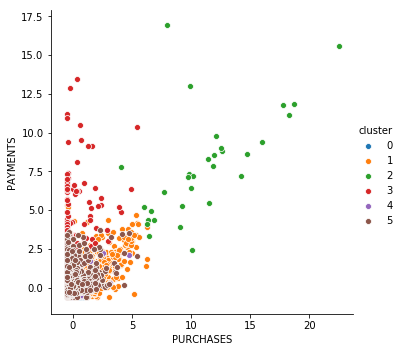

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES'], y_vars=['PAYMENTS'],
            height=5, aspect=1)

## Cluster 3 (Red): The Money Borrowers

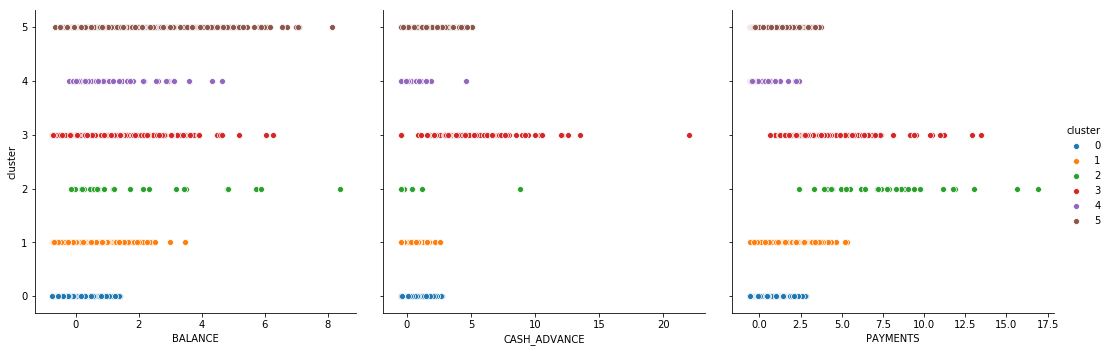

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['BALANCE', 'CASH_ADVANCE', 'PAYMENTS'],
            y_vars=['cluster'],
            height=5, aspect=1)

Wildly varied balance, second highest payments, average purchases. The special thing about this cluster is that these people have the highest cash advance by far - there is even one extreme case that has like 25 cash advance points. We call these people "The Money Borrowers".

## Cluster 4 (Purple): The High Riskers

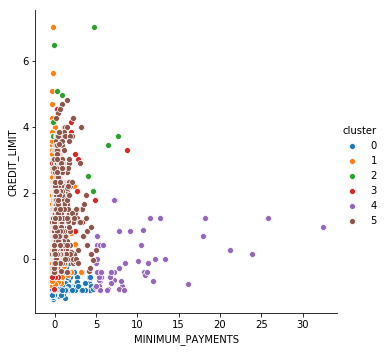

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['MINIMUM_PAYMENTS'], y_vars=['CREDIT_LIMIT'],
            height=5, aspect=1)

This group has absurdly high minimum payments while having the second lowest credit limit. It looks like the bank has identified them as higher risk.

## Cluster 5 (Brown): The Wildcards

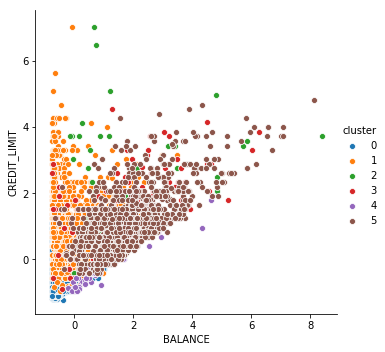

In [ ]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['BALANCE'], y_vars=['CREDIT_LIMIT'],
            height=5, aspect=1)

This group is troublesome to analyze and to come up with a good marketing strategy towards, as both their credit limit and balance values are wildly varied. As you can see, the above graph looks like half of it was made of the color brown!

# Summary and Possible Marketing Strategy

We have learned a lot from this dataset by segmenting the customers into six smaller groups: the Average Joe, the Active Users, the Big Spenders, the Money Borrowers, the High Riskers, and the Wildcards. To conclude this cluster analysis, let's sum up what we have learned and some possible marketing strategies:<br>
* The Average Joe do not use credit card very much in their daily life. They have healthy finances and low debts. While encouraging these people to use credit cards more is necessary for the company's profit, business ethics and social responsibility should also be considered.<br>
<br>
* Identify active customers in order to apply proper marketing strategy towards them. These people are the main group that we should focus on.<br>
<br>
* Some people are just bad at finance management - for example, the Money Borrowers. This should not be taken lightly.<br>
<br>
* Although we are currently doing a good job at managing the High Riskers by giving them low credit limits, more marketing strategies targeting this group of customers should be considered.<br>

# Conclusion

In this project, we have performed data preprocessing, feature extraction with PCA, looked at various clustering metrics (inertias, silhouette scores), experimented with various Clustering algorithms (KMeans Clustering, Agglomerative Hierarchical Clustering, Gaussian Mixture Clustering), data visualizations, and business analytics.

This project is also my first try on the business side of Data Science, and how we can use Machine Learning to solve practical, real life issues.